<a href="https://colab.research.google.com/github/satendra-p/Bike_Sharing_Demand_Prediction_using_ML_Reggression/blob/main/Bike_Sharing_Demand_Prediction_using_ML_Reggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

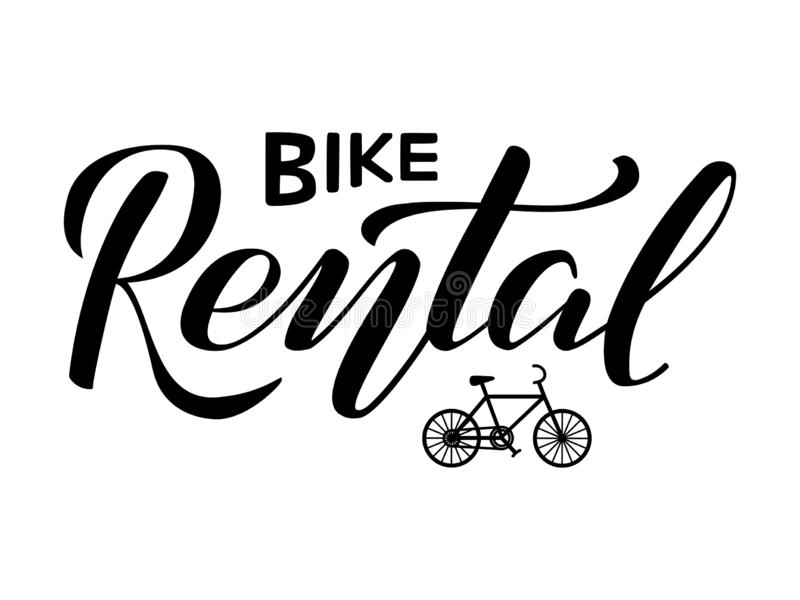

# <b><u> Project Name : Seoul Bike Sharing Demand Prediction </u></b>

---

##### **Project Type**    - Regression
##### **Contribution**    - *Project by Satendra Patel*

# **GitHub Link -**

https://github.com/satendra-p

# **<b> Problem Description </b>**



*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*

# **Data Gathering and Discovery**


*In this section we will import our dataset and do some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable (Rented Bike count).*

# <b> Loading the dataset </b> #

In [8]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# For data visualization

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
# Mounting drive to load data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Reggression_Bike_Sharing/SeoulBikeData.csv',encoding = 'latin')

## Attributes and their Description:- 

*The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.*

***Date*** : year-month-day

***Rented Bike count*** - Count of bikes rented at each hour

***Hour*** - Hour of he day

***Temperature***- Temperature in Celsius

***Humidity*** - %

***Windspeed*** - m/s

***Visibility*** - 10m

***Dew point temperature***- Celsius

***Solar radiation*** - MJ/m2

***Rainfall*** - mm

***Snowfall*** - cm

***Seasons*** - Winter, Spring, Summer, Autumn

***Holiday*** - Holiday/No holiday

***Functional Day*** - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b> Preprocessing the Data </b> 

*Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it.*

In [11]:
# Checking the first 5 rows of the dataset

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
# Checking the last 5 rows of the dataset

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
# List of columns of the dataset 

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Checking the Datatype of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [15]:
# Checking the Statistical info 

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [16]:
# Checking the shape of dataset.

df.shape

(8760, 14)

In [17]:
# Checking null values of data.

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [18]:
# Checking duplicates.

df.duplicated().sum()

0

# <b> Exploratary Data Analysis </b>

*Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the story of the data.*

*It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.*

In [19]:
# Converting the Date column in Datetime Dtype as it is in object Dtype

df['Date']=pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Seperating Day, Month, Year from DataFrame Column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
# dropping the Date column after extracting necessory information.

df.drop(columns=['Date'],inplace=True)

In [ ]:
# Checking the first 5 rows 

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


## <b> Checking Multicollinearity </b>

*Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.*

*A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.*

*Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.*

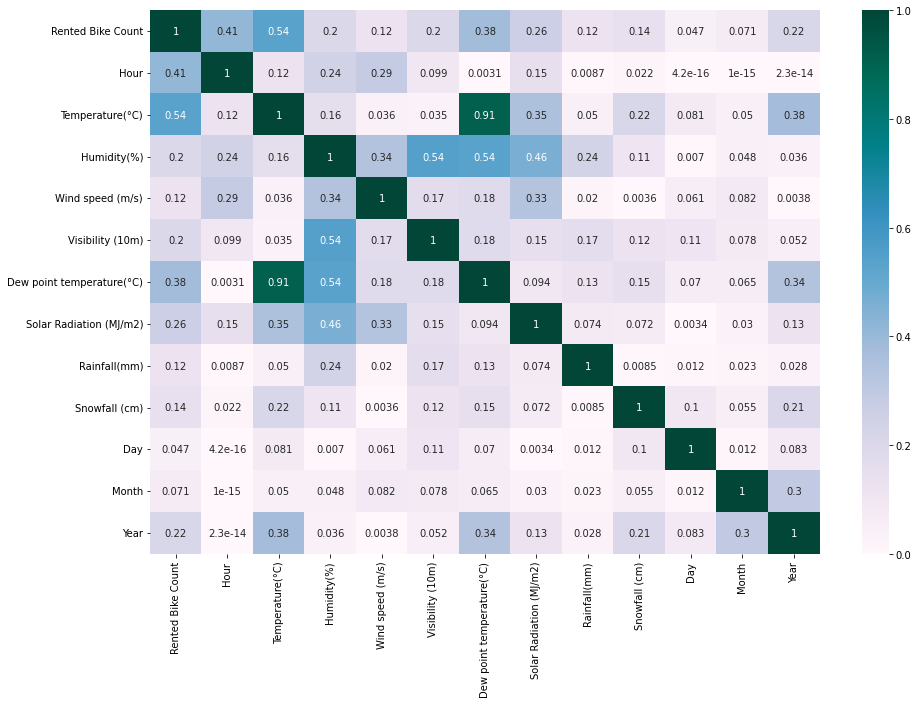

In [ ]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)